In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_df = pd.read_csv("./car_with_rocket_probe_20220208222944.csv")

In [3]:
data_df

,TimeSinceMark,CurrentStage,AltitudeASL,DownRange,SpeedSurface,SpeedOrbital,Mass,Acceleration,Q,AoA,AoS,AoD,AltitudeTrue,Pitch,GravityLosses,DragLosses,SteeringLosses,DeltaVExpended
0,0.000000,1,822.531534,0.218636,2.306369,174.076058,3.2634,1.013912,2.684037,74.730334,-0.010093,74.730333,1.547720,74.661728,0.00000,0.000000,0.00000,0.000000
1,0.020000,1,822.531481,0.268816,2.345790,174.077274,3.2634,1.013847,2.778337,74.726163,-0.008999,74.726162,1.547716,74.661935,0.00000,0.000298,0.00000,0.000000
2,0.240000,1,822.530882,0.873905,2.775479,174.091056,3.2634,1.011924,3.911920,74.739113,-0.004519,74.739113,1.547887,74.672952,0.00000,0.004226,0.00000,0.000000
3,0.460000,1,822.529958,1.572114,3.197489,174.105661,3.2634,1.010772,5.213786,74.756083,-0.000897,74.756083,1.548026,74.670239,0.00000,0.009474,0.00000,0.000000
4,0.680000,1,822.528822,2.361326,3.610991,174.120962,3.2634,1.010417,6.670809,74.740964,-0.000156,74.740964,1.548002,74.655713,0.00000,0.016200,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,223.880405,0,575.662633,7273.284303,0.002271,173.982798,0.4321,0.994806,0.000001,0.000000,0.000000,0.000000,0.452538,-10.789984,101.26542,1750.410051,364.00085,638.152482
970,224.100405,0,575.662663,7273.284447,0.003622,173.982319,0.4321,0.992691,0.000002,0.000000,0.000000,0.000000,0.452581,-10.784394,101.26542,1750.410051,364.00085,638.152482
971,224.320405,0,575.662626,7273.284557,0.003192,173.982003,0.4321,0.993495,0.000003,0.000000,0.000000,0.000000,0.452544,-10.782014,101.26542,1750.410051,364.00085,638.152482
972,224.540405,0,575.662589,7273.284591,0.003383,173.982122,0.4321,0.994999,0.000004,0.000000,0.000000,0.000000,0.452520,-10.781557,101.26542,1750.410051,364.00085,638.152482


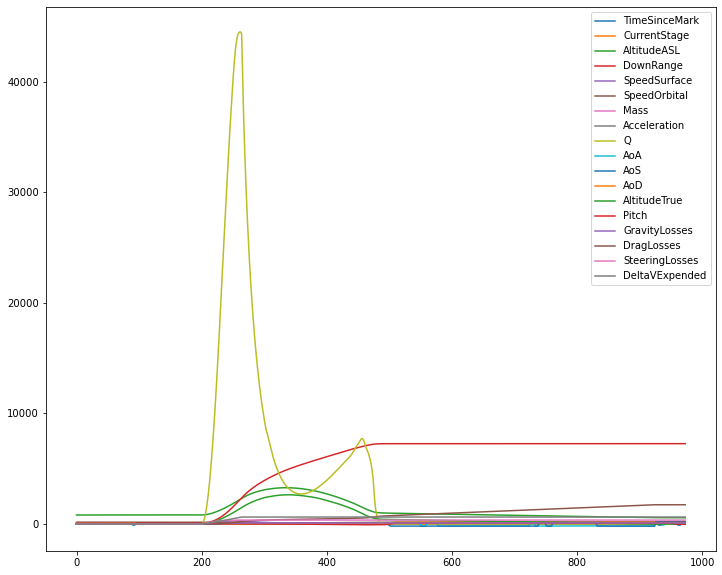

In [4]:
data_df.plot(figsize=(12, 10))


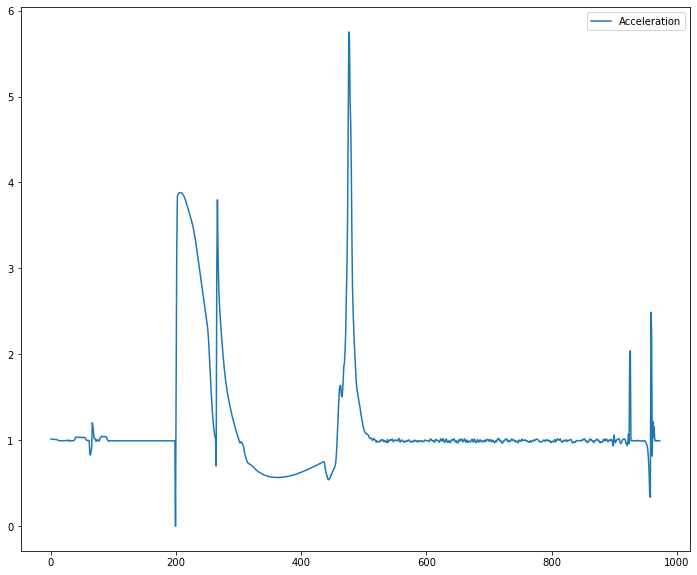

In [5]:
data_df[['Acceleration']].plot(figsize=(12, 10))

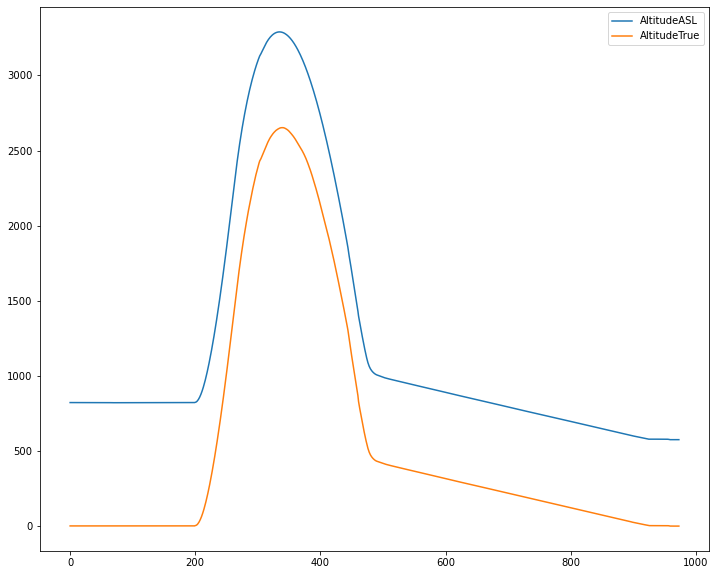

In [6]:
data_df[['AltitudeASL', 'AltitudeTrue']].plot(figsize=(12, 10))

340


TypeError: expected 1D vector for x

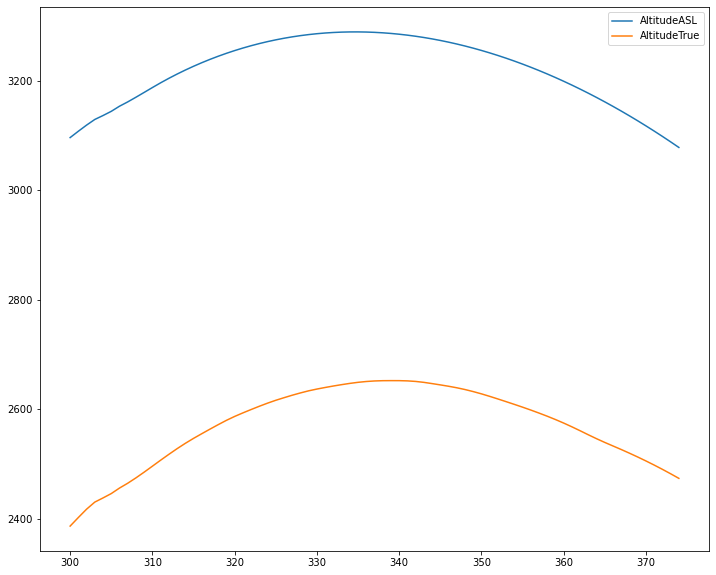

In [53]:
# Define parabola
def f(x): 
    return x**2

# Define parabola derivative
def slope(x): 
    return 2*x

# Define x data range for parabola
x = np.linspace(300,375,100)

# Choose point to plot tangent line
#x1 = -3
#y1 = f(x1)

# Define tangent line
# y = m*(x - x1) + y1
def line(x1, y1):
    z = np.polyfit(x1, y1, 1)
    p = np.poly1d(z)

    return p(z)
    #return slope(x1)*(x - x1) + y1

# Define x data range for tangent line
xrange = np.linspace(339, 341, 10)

# Plot the figure
ax = data_df[['AltitudeASL', 'AltitudeTrue']][300:375].plot(figsize=(12, 10))

#print(ax)

x1 = 340
y1 = data_df['AltitudeTrue'][340]
#y1 = 341

print(x1)

# Plot the average line
mean_line = ax.plot(xrange, line(x1, y1), label='slope', linestyle='--')

In [9]:
df = data_df[['TimeSinceMark', 'AltitudeTrue']]
df

,TimeSinceMark,AltitudeTrue
0,0.000000,1.547720
1,0.020000,1.547716
2,0.240000,1.547887
3,0.460000,1.548026
4,0.680000,1.548002
...,...,...
969,223.880405,0.452538
970,224.100405,0.452581
971,224.320405,0.452544
972,224.540405,0.452520


In [10]:
dataTime = [1,1,1,1,1,1,1,1,1,1]
dataAlt = [1,1,1,1,1,1,1,1,1,1]
for index, d in df.T.iteritems():
   
    result = np.polyfit(np.array(dataTime), np.array(dataAlt), 1)
    if 0 < result[1] < 1:
        print(f"Parachute deployed at {d.TimeSinceMark} - index {index} {result}") 
    
    dataTime = [*dataTime[1:len(dataTime)], d.TimeSinceMark]
    dataAlt = [*dataAlt[1:len(dataAlt)], d.AltitudeTrue]

    #print(d.AltitudeTrue)

#result = np.polyfit(dataTime, dataAlt, 1)
#result

C:\Users\Xavi\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Parachute deployed at 0.0 - index 0 [0.5 0.5]
Parachute deployed at 14.0999996848404 - index 65 [0.05345279 0.88457253]
Parachute deployed at 14.3199996799231 - index 66 [0.08324802 0.49909498]
Parachute deployed at 14.5399996750057 - index 67 [0.10147636 0.25358554]
Parachute deployed at 14.7599996700883 - index 68 [0.08617957 0.44465663]
Parachute deployed at 14.9799996651709 - index 69 [0.05152479 0.90333852]
Parachute deployed at 224.76040526852 - index 973 [-0.00072848  0.61536274]


In [4]:
#dataPt = [1,0,0,0,0,0,0,0,0,2]
import numpy as np

dataTime = [1,1,]
dataAlt = [1,1,]

result = np.polyfit(dataTime, dataAlt, 1)
result
#dataPt.pop()
#dataPt.extend([3])
#datat = dataPt[1:len(dataPt)]
#dataPt = [*dataPt[1:len(dataPt)], 1]

#print(dataPt)

C:\Users\Xavi\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([0.5, 0.5])